In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
from IPython.display import clear_output
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [15]:
def _loader(path: str) -> Image.Image:
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert("L")

In [16]:
images = glob(os.path.join("faces_dataset/train", "*/*"))

In [17]:
class Faces(Dataset):
    def __init__(self, root: str, split: str = "train", transform=None):
        self.root = os.path.join(root, split)
        self.names, self.name2index, self.index2name = self._get_names()
        self.images, self.labels = self._get_people()
        self.total_idxs = np.arange(len(self.images))
        self.transform = transform
        
    def _get_names(self):
        names = list(map(lambda x: int(x), os.listdir(self.root)))
        
        name2index = {name: i for i, name in enumerate(names)}
        index2name = {i: name for i, name in enumerate(names)}
        
        return names, name2index, index2name
    
    def _get_people(self):
        images = glob(os.path.join(self.root, "*/*"))
        labels = [self.name2index[int(image.split("/")[-2])] for image in images]
        return np.array(images), np.array(labels)
    
    def __getitem__(self, item):
        image1 = _loader(self.images[item])
        
        if np.random.uniform() < 0.5:
            image2 = _loader(np.random.choice(self.images[self.labels == self.labels[item]]))
            label = torch.tensor([1], dtype=torch.int)
        else:
            image2 = _loader(np.random.choice(self.images[self.labels != self.labels[item]]))
            label = torch.tensor([0], dtype=torch.int)
        
        return image1, image2, label, torch.tensor([self.labels[item]], dtype=torch.int)
    
    def __len__(self):
        return len(self.images)

In [18]:
dataset = Faces('faces_dataset')

In [19]:
dataset[0]

(<PIL.Image.Image image mode=L size=92x112>,
 <PIL.Image.Image image mode=L size=92x112>,
 tensor([1], dtype=torch.int32),
 tensor([0], dtype=torch.int32))

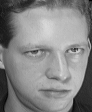

In [24]:
dataset[0][0]

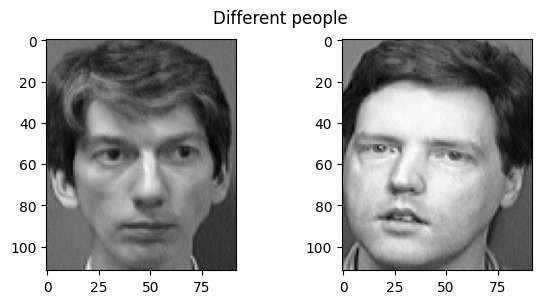

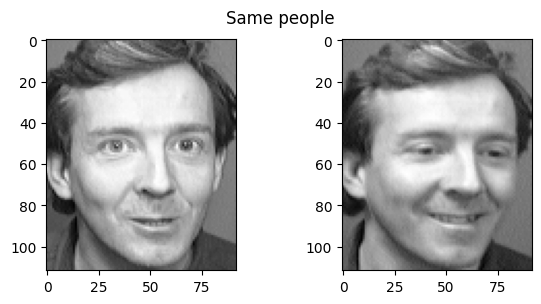

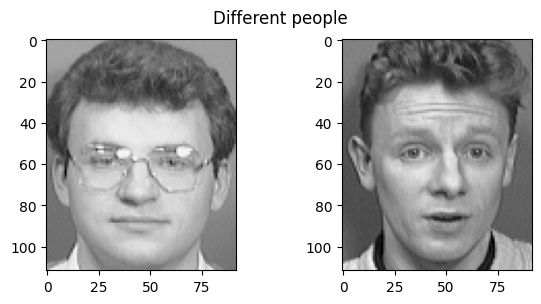

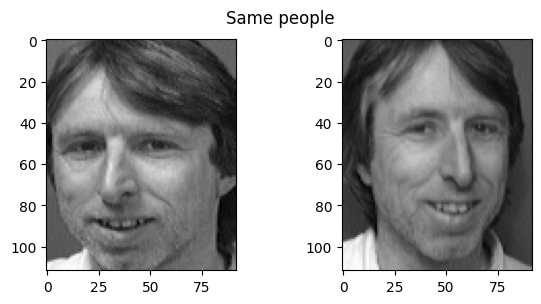

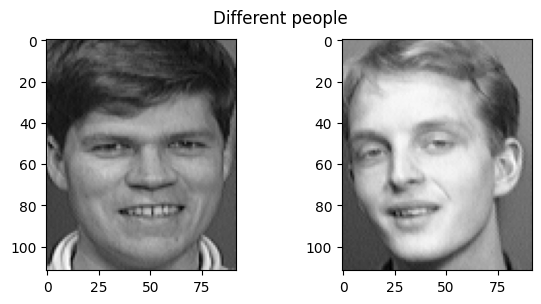

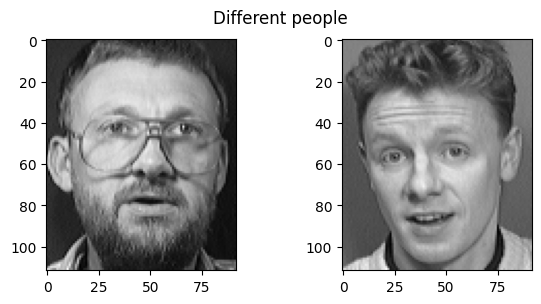

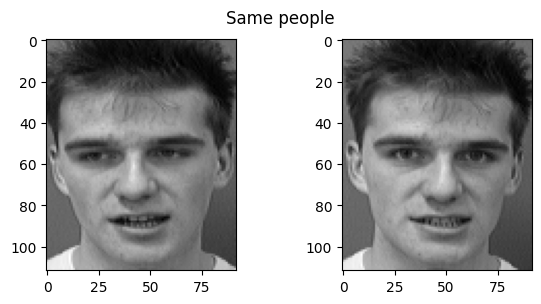

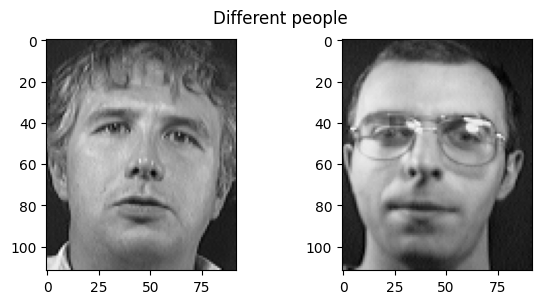

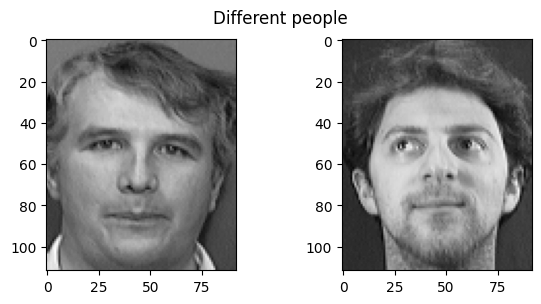

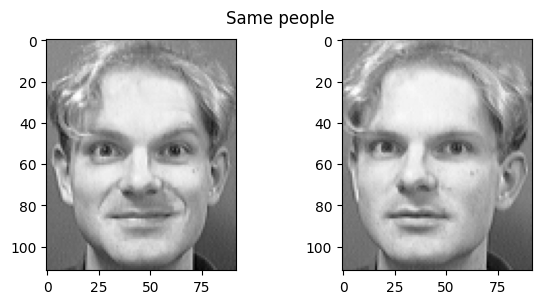

In [31]:
for i in np.random.randint(len(dataset), size=10):
    fig, axs = plt.subplots(1, 2, figsize=(7, 3))
    
    img1, img2, label, _ = dataset[i]
    
    axs[0].imshow(img1, cmap="gray")
    axs[1].imshow(img2, cmap="gray")
    
    fig.suptitle("Same people" if label.item() else "Different people")
    plt.show()